In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
History_Data = pd.read_excel('Competition data.xlsx', sheet_name= 'History Data')

In [7]:
History_Data['Hour'] = History_Data['Hour'] - 1

In [8]:
History_Data['Year'] = History_Data['Year'].astype(str)
History_Data['Month'] = History_Data['Month'].astype(str)
History_Data['Day'] = History_Data['Day'].astype(str)
History_Data['Hour'] = History_Data['Hour'].astype(str)
History_Data['Datetime'] = (History_Data['Year']) +'-' + (History_Data['Month']) +'-' + (History_Data['Day']) \
                           + '-' + (History_Data['Hour'])



In [9]:
History_Data= History_Data.dropna()
History_Data

,Year,Month,Day,Hour,T,Load_kW,Datetime
0,2002,1,1,0,36.0,387190.0,2002-1-1-0
1,2002,1,1,1,35.0,389977.0,2002-1-1-1
2,2002,1,1,2,34.0,391881.0,2002-1-1-2
3,2002,1,1,3,32.0,396362.0,2002-1-1-3
4,2002,1,1,4,33.0,408553.0,2002-1-1-4
5,2002,1,1,5,32.0,426902.0,2002-1-1-5
6,2002,1,1,6,31.0,449139.0,2002-1-1-6
7,2002,1,1,7,32.0,473425.0,2002-1-1-7
8,2002,1,1,8,36.0,487921.0,2002-1-1-8
9,2002,1,1,9,40.0,472487.0,2002-1-1-9


In [10]:
History_Data[History_Data['Datetime'] >= '2005-01-01']

,Year,Month,Day,Hour,T,Load_kW,Datetime
26304,2005,1,1,0,52.0,NaN,2005-1-1-0
26305,2005,1,1,1,52.0,NaN,2005-1-1-1
26306,2005,1,1,2,53.0,NaN,2005-1-1-2
26307,2005,1,1,3,51.0,NaN,2005-1-1-3
26308,2005,1,1,4,52.0,NaN,2005-1-1-4
26309,2005,1,1,5,52.0,NaN,2005-1-1-5
26310,2005,1,1,6,50.0,NaN,2005-1-1-6
26311,2005,1,1,7,49.0,NaN,2005-1-1-7
26312,2005,1,1,8,58.0,NaN,2005-1-1-8
26313,2005,1,1,9,65.0,NaN,2005-1-1-9


In [573]:
History_Data.drop('Year', axis =1 , inplace= True)
History_Data.drop('Month', axis =1 , inplace= True)
History_Data.drop('Day', axis =1 , inplace= True)
History_Data.drop('Hour', axis =1 , inplace= True)
History_Data['Timestamp'] = pd.to_datetime(History_Data.Datetime,format='%Y-%m-%d-%H') 

train=History_Data.iloc[0:17520,:]
test=History_Data.iloc[17520:26303,:]
History_Data.index = History_Data.Timestamp 

In [574]:
#test.head(3)

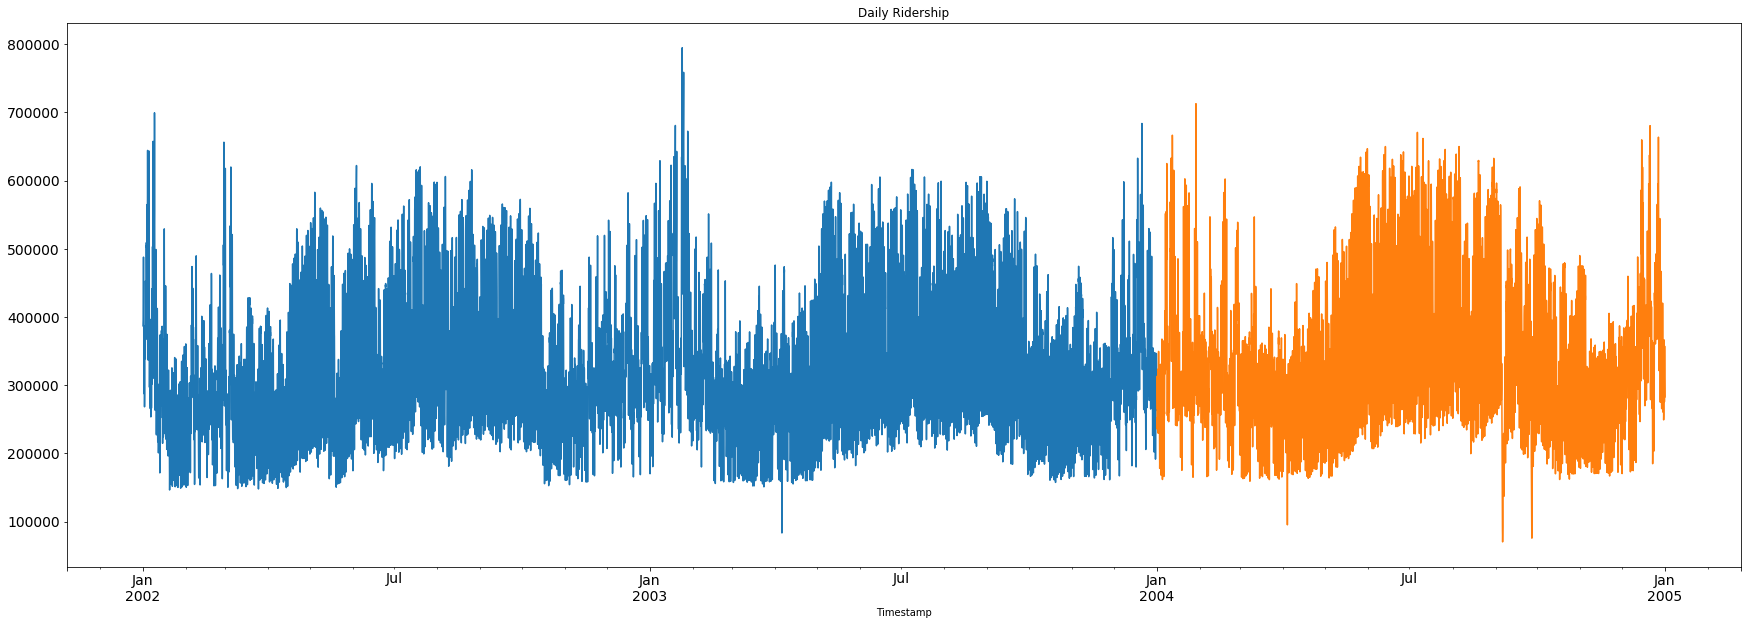

In [575]:
train.index = train.Timestamp 
test.index = test.Timestamp 

testActual = test.copy()
#train = train.resample('w').mean()
#test = test.resample('w').mean()

train['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)
test['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)

In [526]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

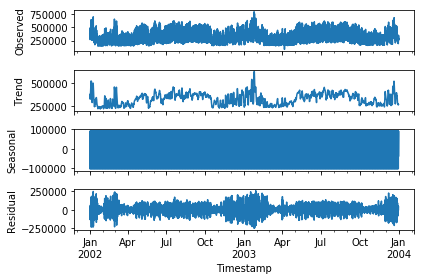

In [527]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['Load_kW']).plot()
#result = sm.tsa.stattools.adfuller(train['T'])
plt.show()

In [451]:
?ExponentialSmoothing

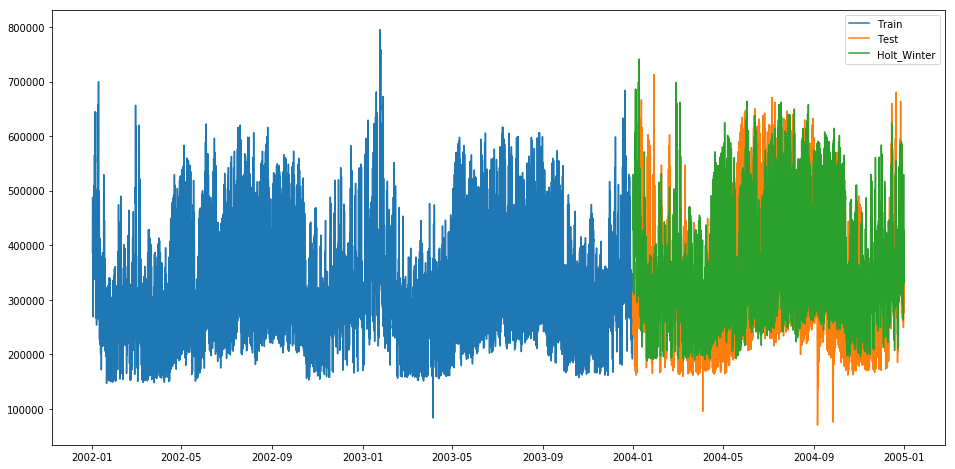

CPU times: user 1h 22min, sys: 7.61 s, total: 1h 22min 7s
Wall time: 1h 48min 6s


In [540]:
%%time
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Load_kW']) ,seasonal_periods= 24*365 ,trend=None, seasonal='additive',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))

plt.plot(train['Load_kW'], label='Train')
plt.plot(test['Load_kW'], label='Test')
#plt.plot(testActual['Load_kW'], label='Test Actual')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [541]:
fit1.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 296532.0,
 'initial_slope': nan,
 'initial_seasons': array([ 90657.84739275,  93445.        ,  95349.        , ...,
        -31584.        , -54963.        , -74934.82559171]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [545]:
rms = sqrt(mean_squared_error(test['Load_kW'], y_hat_avg['Holt_Winter']))
print(rms)
mape = mean_absolute_percentage_error(test['Load_kW'], y_hat_avg['Holt_Winter'])
print(mape)

91779.2949038047
21.842161831832346


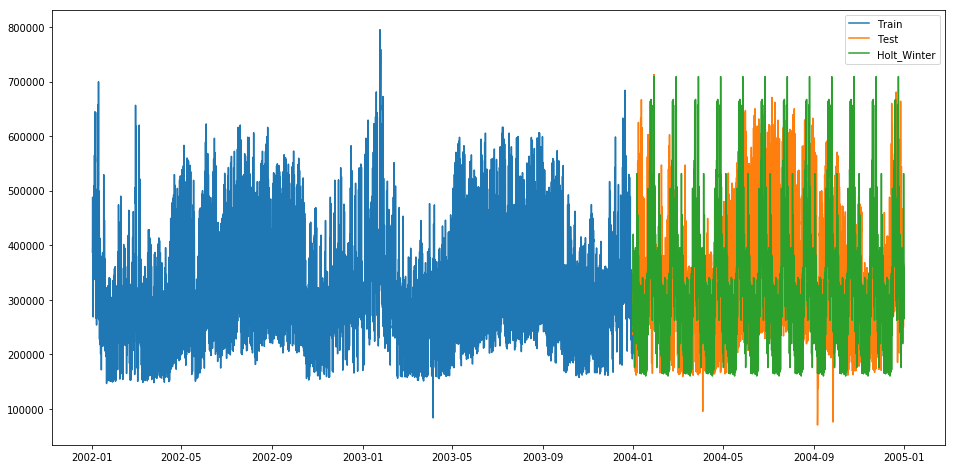

CPU times: user 35min 32s, sys: 4.41 s, total: 35min 37s
Wall time: 5min 57s


In [535]:
%%time
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Load_kW']) ,seasonal_periods= 24*30 ,trend=None, seasonal='additive',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))

plt.plot(train['Load_kW'], label='Train')
plt.plot(test['Load_kW'], label='Test')
#plt.plot(testActual['Load_kW'], label='Test Actual')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [539]:
rms = sqrt(mean_squared_error(test['Load_kW'], y_hat_avg['Holt_Winter']))
print(rms)
temp = mean_absolute_error(test['Load_kW'], y_hat_avg['Holt_Winter'])
print(temp)

145735.18494672398
110160.49473231999


In [496]:
for i_seasonal_period in [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24]:
    for i_seasonal in ['additive','multiplicative']:
        y_hat_avg = test.copy()
        fit1 = ExponentialSmoothing(np.asarray(train['Load_kW']) ,seasonal_periods= i_seasonal_period ,trend=None, 
                                    seasonal= i_seasonal,).fit()
        y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
        rms = sqrt(mean_squared_error(testActual['Load_kW'], y_hat_avg['Holt_Winter']))
        rms = round(rms)
        print('seasonal_period' ,i_seasonal_period, ' seasonal',i_seasonal, 'rmse', rms)


ValueError: Found input variables with inconsistent numbers of samples: [8783, 13]

In [413]:
rms = sqrt(mean_squared_error(test['Load_kW'], y_hat_avg['Holt_Winter']))
print(rms)

23365.024769538275


In [257]:
# seasonal_periods= 12  23365.024769538275

